# 1. Prepare

In [1]:
import sys
rootPath = '/Users/floyd/Desktop/Research/NER-CRF/cctner/'
sys.path.append('/Users/floyd/Desktop/Research/NER-CRF/cctner')


from text import ChineseClinicalText as CCT
from dataset import batch1, batch2, generateOriAn
import os

# 2. Get All Files

In [24]:
pathDict = generateOriAn(**batch1['dataInput'])
print([(k, len(pathDict[k])) for k in pathDict])
pathDict['一般项目'][:3]

[('一般项目', 300), ('病史特点', 300), ('诊疗经过', 299), ('出院情况', 299)]


[{'annotedFilePath': '/Users/floyd/Desktop/Research/NER-CRF/cctner/dataset/annoted/batch1/一般项目/一般项目-1.txt',
  'originalFilePath': '/Users/floyd/Desktop/Research/NER-CRF/cctner/dataset/annoted/batch1/一般项目/一般项目-1.txtoriginal.txt'},
 {'annotedFilePath': '/Users/floyd/Desktop/Research/NER-CRF/cctner/dataset/annoted/batch1/一般项目/一般项目-10.txt',
  'originalFilePath': '/Users/floyd/Desktop/Research/NER-CRF/cctner/dataset/annoted/batch1/一般项目/一般项目-10.txtoriginal.txt'},
 {'annotedFilePath': '/Users/floyd/Desktop/Research/NER-CRF/cctner/dataset/annoted/batch1/一般项目/一般项目-100.txt',
  'originalFilePath': '/Users/floyd/Desktop/Research/NER-CRF/cctner/dataset/annoted/batch1/一般项目/一般项目-100.txtoriginal.txt'}]

In [26]:
pathDict = generateOriAn(**batch2['dataInput'])
print([(k, len(pathDict[k])) for k in pathDict])
pathDict['text'][:3]

[('text', 52)]


[{'annotedFilePath': '/Users/floyd/Desktop/Research/NER-CRF/cctner/dataset/annoted/batch2/text/text10_StandardFormat.txt',
  'originalFilePath': '/Users/floyd/Desktop/Research/NER-CRF/cctner/dataset/annoted/batch2/text/text10.txt'},
 {'annotedFilePath': '/Users/floyd/Desktop/Research/NER-CRF/cctner/dataset/annoted/batch2/text/text11_StandardFormat.txt',
  'originalFilePath': '/Users/floyd/Desktop/Research/NER-CRF/cctner/dataset/annoted/batch2/text/text11.txt'},
 {'annotedFilePath': '/Users/floyd/Desktop/Research/NER-CRF/cctner/dataset/annoted/batch2/text/text12_StandardFormat.txt',
  'originalFilePath': '/Users/floyd/Desktop/Research/NER-CRF/cctner/dataset/annoted/batch2/text/text12.txt'}]

# 3. Get All CCTs in a Dictionary

In [27]:
import time
btime = time.clock()
timeConsmpt = []

batch = batch2
pathDict = generateOriAn(**batch['dataInput'])
CCTDict = {}

for filename in pathDict:
    CCTDict[filename] = []
    for cctPathDict in pathDict[filename]:
        #print(cctPathDict['originalFilePath'])
        bbtime = time.clock()
        cct = CCT(batch, **cctPathDict)
        cct.execute()
        cct.getAnnotedEntities('RTag')
        cct.corpAnnotation('RTag')
        cct.getAnnotedEntities('ETag')
        cct.corpAnnotation('ETag')
        CCTDict[filename].append(cct)
        eetime = time.clock()     
        timeConsmpt.append(eetime - bbtime)
        
etime = time.clock()

print('Time Consumption: ', (etime - btime)/60,'mins')

Time Consumption:  2.0546417333333324 mins


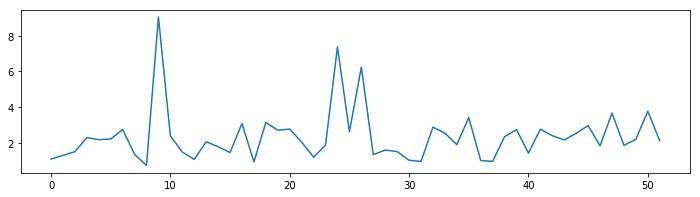

In [28]:
%matplotlib inline
import pandas as pd

Time = pd.Series(timeConsmpt)
Time.plot(figsize=(12,3))

# 4. Serialize CCT to Pickle

In [29]:
import pickle
import os
batch = batch2

from datetime import datetime
now = datetime.now()
date = now.date()
print(date)
rootPath = batch['dataInput']['rootPath']
pkPath = rootPath + 'pkldata/'+ batch['name'] + '-' + str(date)
try:
    os.mkdir(pkPath)
except:
    pass

with open(pkPath + '/CCT_Dict'+'.p', 'wb') as handle:
    pickle.dump(CCTDict, handle)

with open(pkPath + '/CCT_Log' +'.p', 'wb') as handle:
    pickle.dump([Time, etime, btime ], handle)

2018-04-04


# 5. Summary as a Function

In [30]:
def annoPickle(batch):
    
    pathDict = generateOriAn(**batch['dataInput'])
    CCTDict = {}

    for filename in pathDict:
        CCTDict[filename] = []
        for cctPathDict in pathDict[filename]:
            #print(cctPathDict['originalFilePath'])
            bbtime = time.clock()
            cct = CCT(batch, **cctPathDict)
            cct.execute()
            cct.getAnnotedEntities('RTag')
            cct.corpAnnotation('RTag')
            cct.getAnnotedEntities('ETag')
            cct.corpAnnotation('ETag')
            CCTDict[filename].append(cct)
            eetime = time.clock()     
            timeConsmpt.append(eetime - bbtime)

    etime = time.clock()
    
    Time = pd.Series(timeConsmpt)
    now = datetime.now()
    date = now.date()
    print(date)
    rootPath = batch['dataInput']['rootPath']
    pkPath = rootPath + 'pkldata/'+ batch['name'] + '-' + str(date)
    
    try:
        os.mkdir(pkPath)
    except:
        pass

    with open(pkPath + '/CCT_Dict'+'.p', 'wb') as handle:
        pickle.dump(CCTDict, handle)

    with open(pkPath + '/CCT_Log' +'.p', 'wb') as handle:
        pickle.dump([Time, etime, btime ], handle)

In [31]:
annoPickle(batch1)

2018-04-04
